## Deterministic VS Stochastic(nondeterministic)

* Deterministic : 같은 액션에 항상 같은 state와 항상 같은 reward를 받는다
* Stochastic : 같은 액션에 대해서 다른 state와 다른 reward를 받을 수 있다

(Stochastic의 경우 $ \hat{Q}(s,a) = r + \gamma * max\hat{Q}(s',a') $를 적용해도 성공률이 저조함)
* 해결방법은 Q에게 과하게 의존하지 않고 조금만 정보를 받아오는 방식, learning rate $ \alpha $를 추가한다
$ (1-\alpha)\hat{Q}(s,a) + \alpha[r + {\gamma}max\hat{Q}(s',a')]$
(이 역시 최적 Q로 수렴한다)

In [2]:
# Stochastic 기존방법
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

register(
    id = 'FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4',
            'is_slippery' : True} # Stochastic
)
env = gym.make('FrozenLake-v3') # environment 생성

Q = np.zeros([env.observation_space.n, env.action_space.n]) # 16개의 S, 4개의 A
num_episodes = 2000 # 2000번 정도의 루프 학습

dis = 0.99
rList =[]

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    e = 1. / ((i//100) + 1)
    
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)/(i+1))
        # add noise
        
        '''if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :]) # decaying e-greedy
        '''
        new_state, reward, done, _ = env.step(action)
    
        Q[state, action] = reward + dis * np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state
    
    rList.append(rAll)


Success rate : 0.0205
L D R U
[[0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.96059601 0.         0.        ]
 [0.         0.         0.         0.        ]]


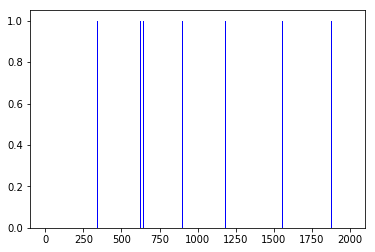

In [3]:
print('Success rate : ' + str(sum(rList)/num_episodes))
print('L D R U')
print(Q)
plt.bar(range(len(rList)), rList, color = 'blue')
plt.show()

In [5]:
# Stochastic 새방법
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

env = gym.make('FrozenLake-v3') # environment 생성

Q = np.zeros([env.observation_space.n, env.action_space.n]) # 16개의 S, 4개의 A
num_episodes = 2000 # 2000번 정도의 루프 학습

dis = 0.99
rList =[]
learning_rate = 0.85
for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    e = 1. / ((i//100) + 1)
    
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)/(i+1))
        # add noise
        new_state, reward, done, _ = env.step(action)
    
        Q[state, action] = (1-learning_rate) * Q[state,action] + learning_rate*(reward + dis * np.max(Q[new_state,:]))
        
        rAll += reward
        state = new_state
    
    rList.append(rAll)

Success rate : 0.594
L D R U
[[4.23232866e-01 1.60430996e-02 1.81944998e-02 2.30103686e-03]
 [1.72358625e-04 1.80389653e-03 1.45693252e-03 7.55911878e-01]
 [3.70077565e-03 2.11470922e-03 1.20506424e-03 5.93719118e-01]
 [0.00000000e+00 6.25746296e-03 0.00000000e+00 4.19529512e-01]
 [7.48707700e-01 0.00000000e+00 2.55941152e-03 1.74932974e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.20180665e-04 1.23974616e-05 2.39395167e-04 1.48905365e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.93931394e-04 2.74368437e-03 1.99776009e-03 3.34976299e-01]
 [2.58448845e-04 5.72945873e-02 1.55679788e-03 0.00000000e+00]
 [4.69464020e-01 5.90899423e-04 0.00000000e+00 3.26076355e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.80800004e-03 7.17267888e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.57966800e-01]
 [0.00000000e+00 0.0000000

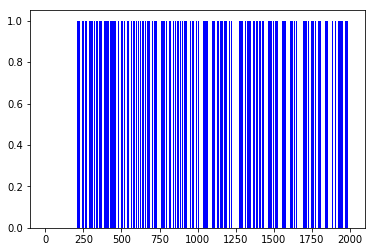

In [7]:
print('Success rate : ' + str(sum(rList)/num_episodes))
print('L D R U')
print(Q)
plt.bar(range(len(rList)), rList, color = 'blue')
plt.show()

In [4]:
print(state)

7
